In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, GLMakie, JLD
GLMakie.activate!()

In [2]:
function sigma(x)
    λ = 10
    θ = -0.25
    return 1.0 / (1.0 + exp(-λ * (x  - θ)))
end
function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chemical_link, electrical_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chemical_link * ( x1 - vs ) * sigma(x2) + electrical_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chemical_link * ( x2 - vs ) * sigma(x1) + electrical_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [607]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.0
electrical_link = 0.0

u0 = tr[end]

p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)
tr = trajectory(ds, 10000, Ttr  = 100000; Δt = 0.01, diffeq = (alg = Vern9(), adaptive = false, dt = 0.01));
ds

6-dimensional continuous dynamical system
 state:       [-1.21799, -6.49496, 3.75312, -1.28545, -7.24666, 3.83548]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.0, 0.0]

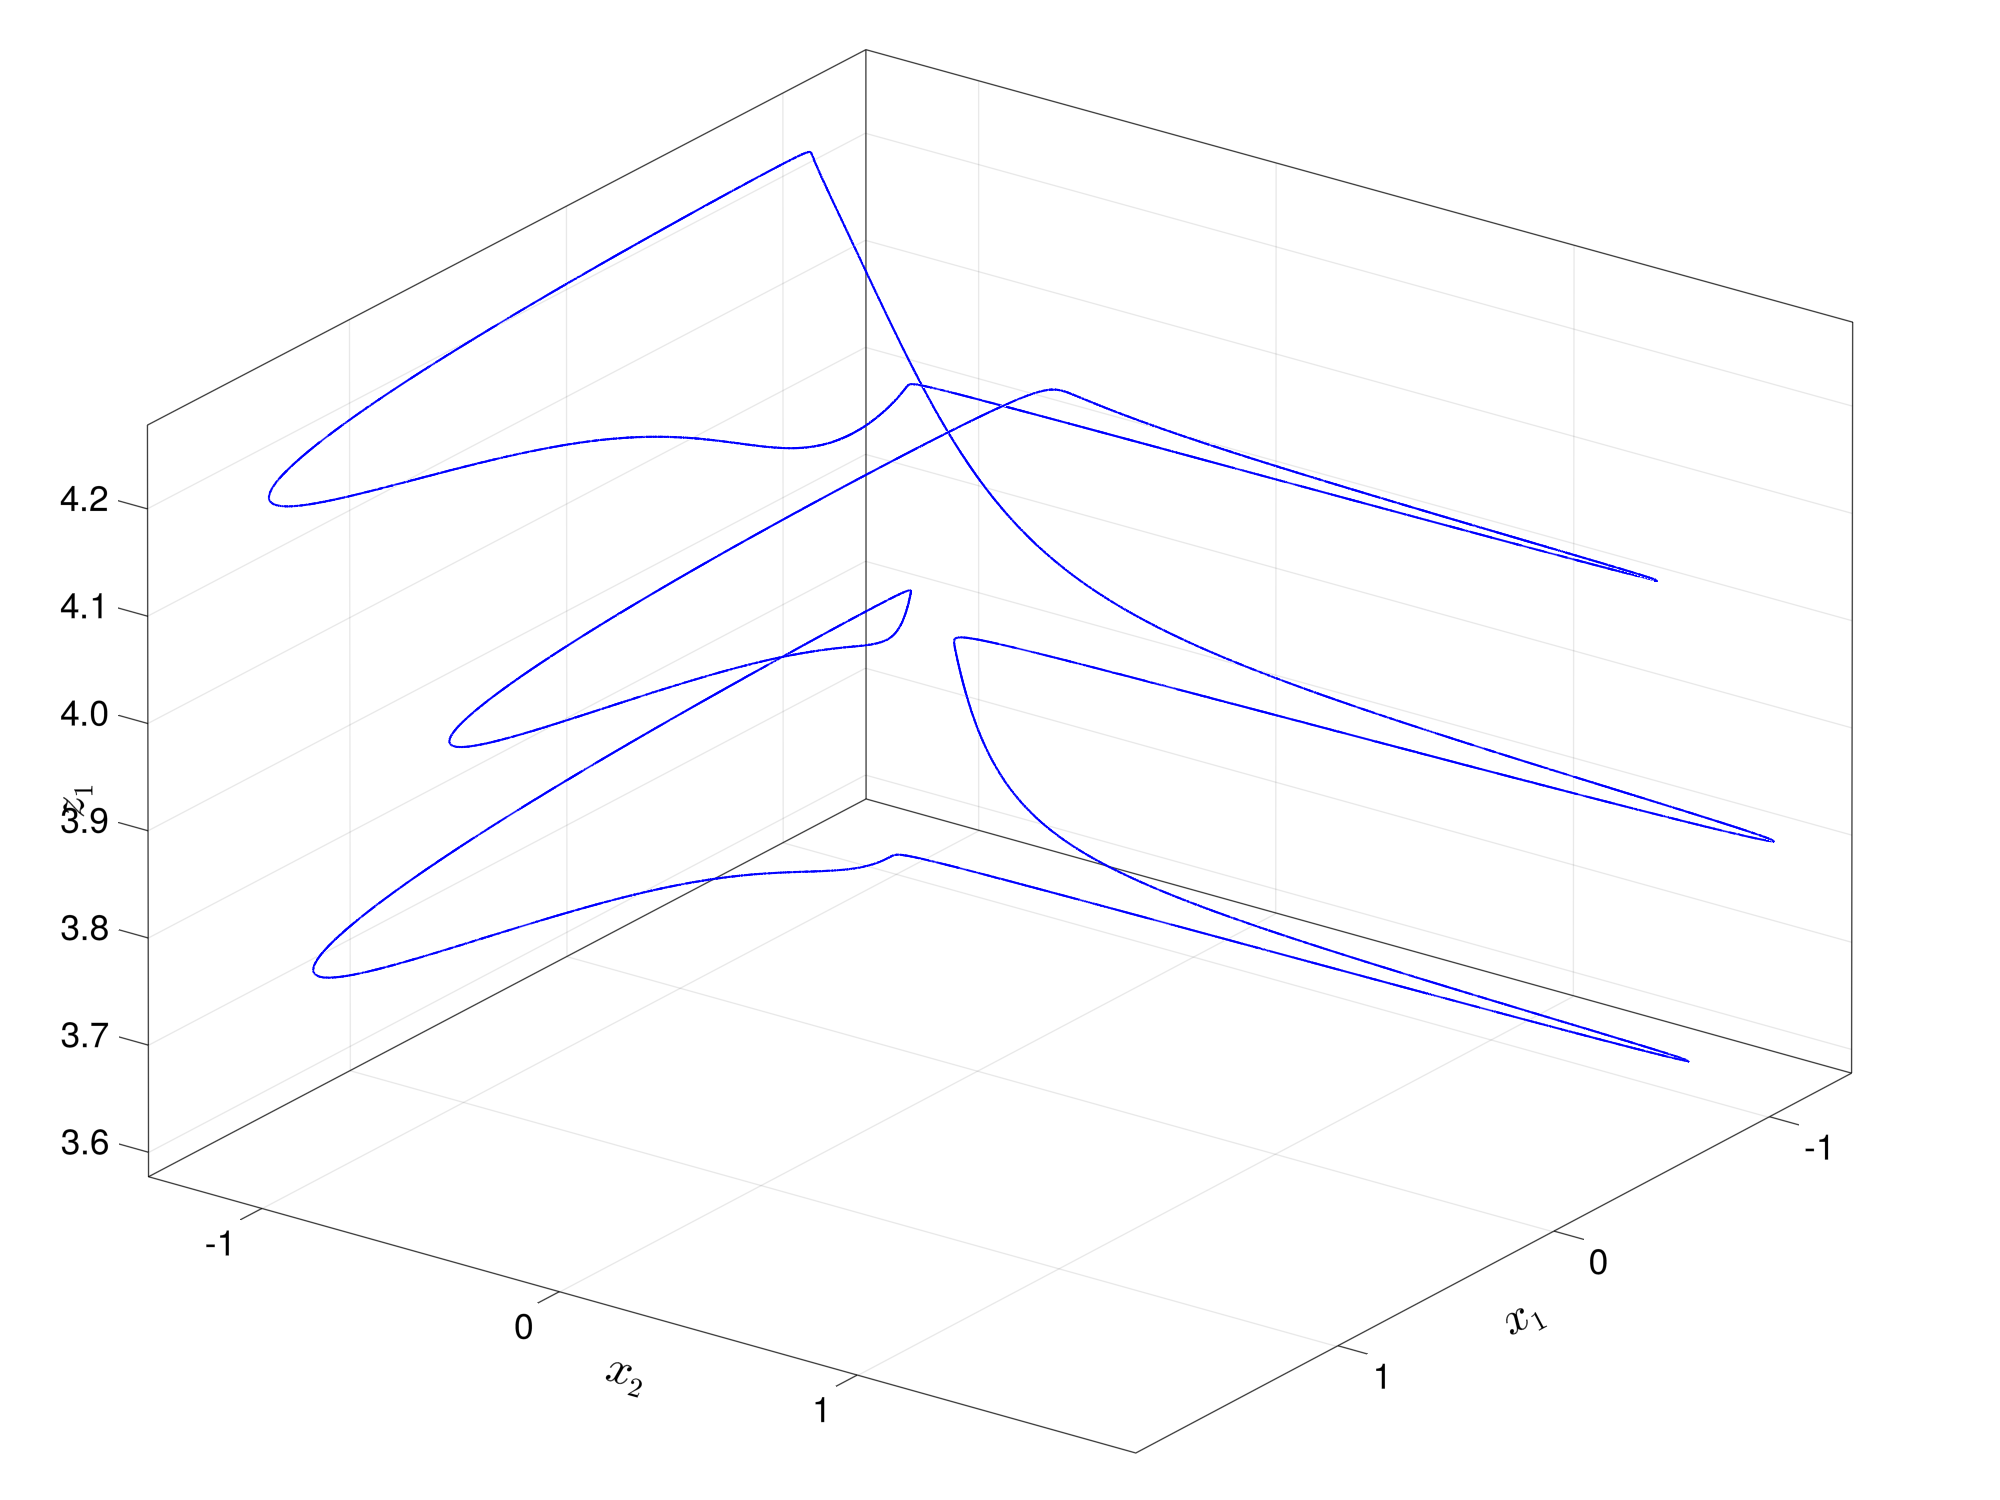

In [608]:
ts = 200000; tf = 250000;
ticksize = 35
labelsize = 45
f = Figure(resolution = (2000, 1500))
ax1  = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_1", azimuth = 0.2pi,
             xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
            xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize)

lines!(ax1, tr[ts:tf, 1], tr[ts:tf, 4], tr[ts:tf, 3], linewidth = 1.5, color = :blue)
f

In [ ]:
ts = 200000; tf = 250000;
f = Figure(resolution = (1200, 1200))
ax1  = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1")
ax2 = Axis3(f[1, 2], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_1", azimuth = 0.2pi)
ax3 = Axis3(f[2, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z_1", azimuth = 0.2pi)
ax4 = Axis3(f[2, 2], xlabel = L"z_1", ylabel = L"z_2", zlabel = L"y_1")

lines!(ax1, tr[ts:tf, 1], tr[ts:tf, 2], tr[ts:tf, 3], linewidth = 1.0, color = :blue)
lines!(ax2, tr[ts:tf, 1], tr[ts:tf, 4], tr[ts:tf, 2], linewidth = 1.0, color = :blue)
lines!(ax3, tr[ts:tf, 1], tr[ts:tf, 4], tr[ts:tf, 3], linewidth = 1.0, color = :blue)
lines!(ax4, tr[ts:tf, 3], tr[ts:tf, 6], tr[ts:tf, 2], linewidth = 1.0, color = :blue)
f